In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
from datetime import datetime
from math import log

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgi

import fig_settings as fs

In [3]:
colors = ["#2d5d83", "#4f9bd9", "#077187", "#3dfaff", "#8b888e"]
fs.set_fonts()

In [4]:
with open("data/starterpack-stats.json") as f:
    data = json.load(f)

component_sizes, component_numbers = data["components"]
edge_sizes = np.array(data["edge-sizes"])
degrees = np.array(data["degrees"])

creation_dates = [datetime.strptime(date, "%Y-%m-%d") for date in data["date-created"]]
n_starterpacks_created = np.array(data["number-created"])
num_nodes = data["num-nodes"]
num_edges = data["num-edges"]

min_edge_size = data["min-edge-size"]
max_edge_size = data["max-edge-size"]
mean_edge_size = data["mean-edge-size"]
median_edge_size = data["median-edge-size"]
mode_edge_size = data["mode-edge-size"]

min_degree = data["min-degree"]
max_degree = data["max-degree"]
mean_degree = data["mean-degree"]
median_degree = data["median-degree"]
mode_degree = data["mode-degree"]

account_age_at_creation = data["account-age-at-creation"]

In [5]:
sum(component_numbers)

383

In [6]:
print(
    f"{round((num_nodes - len(n_starterpacks_created))/num_nodes*100, 1)}% of users did not make a starter pack"
)

84.2% of users did not make a starter pack


In [7]:
print(
    f"The minimum number of starter packs created is {n_starterpacks_created.min().item()}"
)
print(
    f"The maximum number of starter packs created is {n_starterpacks_created.max().item()}"
)
print(
    f"The mean number of starter packs created is {n_starterpacks_created.mean().item()}"
)
print(
    f"The median number of starter packs created is {np.median(n_starterpacks_created).item()}"
)

vals, counts = np.unique(n_starterpacks_created, return_counts=True)
print(f"The mode number of starter packs created is {vals[np.argmax(counts)]}")

The minimum number of starter packs created is 1
The maximum number of starter packs created is 664
The mean number of starter packs created is 1.1414447142429627
The median number of starter packs created is 1.0
The mode number of starter packs created is 1


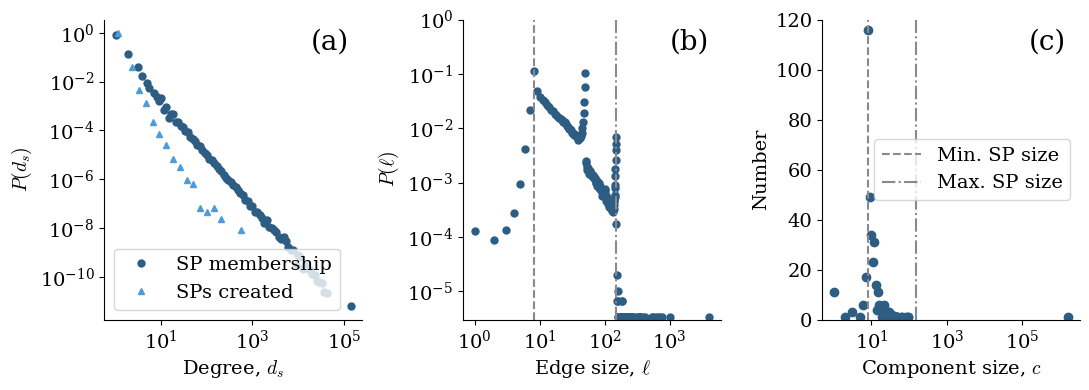

In [8]:
plt.figure(figsize=(11, 4))

plt.subplot(131)
ax = plt.gca()
plt.text(0.8, 0.9, "(a)", fontsize=20, transform=ax.transAxes)

hist, bin_edges = np.histogram(
    degrees,
    bins=np.logspace(np.log10(degrees.min()), np.log10(degrees.max()), 100),
    density=True,
)
hist /= hist.sum()

bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]

plt.plot(bin_centers, hist, "o", color=colors[0], markersize=5, label="SP membership")

hist, bin_edges = np.histogram(
    n_starterpacks_created,
    bins=np.logspace(
        np.log10(n_starterpacks_created.min()),
        np.log10(n_starterpacks_created.max()),
        20,
    ),
    density=True,
)
hist /= hist.sum()

bin_centers = [
    (bin_edges[ix] + bin_edges[ix + 1]) / 2 for ix in range(len(bin_edges) - 1)
]

plt.plot(bin_centers, hist, "^", color=colors[1], markersize=5, label="SPs created")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Degree, $d_s$")
plt.ylabel(r"$P(d_s)$")
plt.minorticks_off()
plt.legend(loc="lower left")
plt.minorticks_off()
sns.despine()

plt.subplot(132)
ax = plt.gca()
plt.text(0.8, 0.9, "(b)", fontsize=20, transform=ax.transAxes)

s, p = np.unique(edge_sizes, return_counts=True)
plt.plot(s, p / p.sum(), "o", markersize=5, color=colors[0])
plt.plot([8, 8], [3e-6, 1], "--", label="Min. starter pack size", color=colors[4])
plt.plot([150, 150], [3e-6, 1], "-.", label="Max. starter pack size", color=colors[4])
plt.xscale("log")
plt.yscale("log")
plt.ylim([3e-6, 1])
plt.xlabel(r"Edge size, $\ell$")
plt.ylabel(r"$P(\ell)$")
plt.minorticks_off()
sns.despine()

plt.subplot(133)
ax = plt.gca()
plt.text(0.8, 0.9, "(c)", fontsize=20, transform=ax.transAxes)

plt.plot(component_sizes, component_numbers, "o", color=colors[0])
plt.xscale("log")
plt.plot([8, 8], [0, 120], "--", label="Min. SP size", color=colors[4])
plt.plot([150, 150], [0, 120], "-.", label="Max. SP size", color=colors[4])

plt.legend()
plt.ylim([0, 120])
plt.xlabel(r"Component size, $c$")
plt.ylabel("Number")
plt.minorticks_off()
sns.despine()

plt.tight_layout()
plt.savefig("figures/starterpack_stats.pdf", dpi=1000)
plt.show()

In [9]:
## stats about starter pack sizes
print(f"Min starter pack size is ", min_edge_size)
print(f"Max starter pack size is ", max_edge_size)
print(f"Mean starter pack size is ", round(mean_edge_size, 3))
print(f"Mean starter pack size is ", median_edge_size)
print(f"Mode of the starter pack size is ", mode_edge_size)

# stats about the degree
print(f"Min degree is ", min_degree)
print(f"Max degree is ", max_degree)
print(f"Mean degree is ", round(mean_degree, 3))
print(f"Mean degree is ", median_degree)
print(f"Mode of the degree is ", mode_degree)

Min starter pack size is  0
Max starter pack size is  4070
Mean starter pack size is  32.862
Mean starter pack size is  24.0
Mode of the starter pack size is  8
Min degree is  1
Max degree is  145343
Mean degree is  5.923
Mean degree is  1.0
Mode of the degree is  1


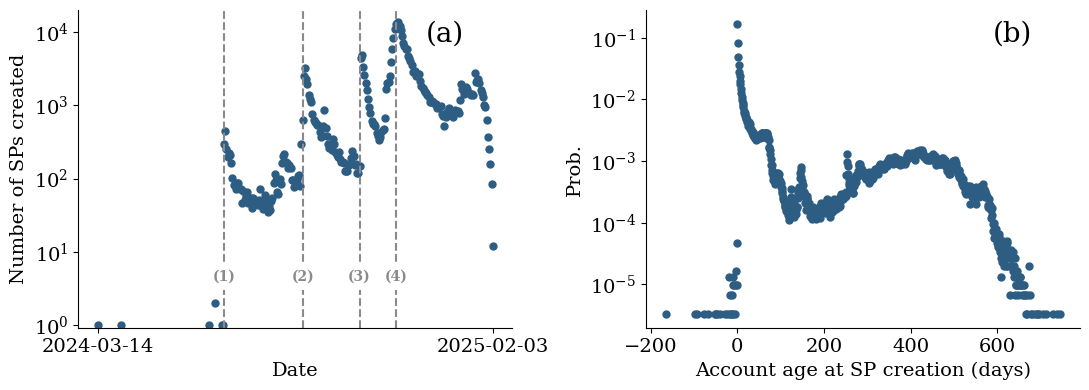

In [10]:
plt.figure(figsize=(11, 4))

ymin = 0.9
ymax = 20000

text_height = 4

plt.subplot(121)
ax = plt.gca()
plt.text(0.8, 0.9, "(a)", fontsize=20, transform=ax.transAxes)

t, c = np.unique(creation_dates, return_counts=True)

plt.plot(t, c, "o", markersize=5, color=colors[0])

# announcement of starterpacks
t_notable = datetime(2024, 6, 26)
plt.plot([t_notable, t_notable], [ymin, ymax], "--", color=colors[4])
tb = plt.text(
    t_notable,
    text_height,
    "(1)",
    horizontalalignment="center",
    fontweight="bold",
    color=colors[4],
)
tb.set_bbox(dict(facecolor="white", alpha=1, linewidth=0))

# banning of X in Brazil
t_notable = datetime(2024, 8, 30)
plt.plot([t_notable, t_notable], [ymin, ymax], "--", color=colors[4])
tb = plt.text(
    t_notable,
    text_height,
    "(2)",
    horizontalalignment="center",
    fontweight="bold",
    color=colors[4],
)
tb.set_bbox(dict(facecolor="white", alpha=1, linewidth=0))

# New terms of service allowing blocked users to see posts
t_notable = datetime(2024, 10, 16)
plt.plot([t_notable, t_notable], [ymin, ymax], "--", color=colors[4])
tb = plt.text(
    t_notable,
    text_height,
    "(3)",
    horizontalalignment="center",
    fontweight="bold",
    color=colors[4],
)
tb.set_bbox(dict(facecolor="white", alpha=1, linewidth=0))

# New terms of service allowing X to train AI on user content
t_notable = datetime(2024, 11, 15)
plt.plot([t_notable, t_notable], [ymin, ymax], "--", color=colors[4])
tb = plt.text(
    t_notable,
    text_height,
    "(4)",
    horizontalalignment="center",
    fontweight="bold",
    color=colors[4],
)
tb.set_bbox(dict(facecolor="white", alpha=1, linewidth=0))

plt.yscale("log")
plt.xticks([min(t), max(t)])
plt.ylim([ymin, ymax])
plt.minorticks_off()
sns.despine()

plt.xlabel(r"Date")
plt.ylabel(r"Number of SPs created")

plt.subplot(122)
ax = plt.gca()
plt.text(0.8, 0.9, "(b)", fontsize=20, transform=ax.transAxes)
d, p = np.unique(account_age_at_creation, return_counts=True)
plt.plot(d, p / p.sum(), "o", markersize=5, color=colors[0])
plt.yscale("log")
plt.xlabel(r"Account age at SP creation (days)")
plt.ylabel(r"Prob.")
plt.minorticks_off()
sns.despine()

plt.tight_layout()
plt.savefig("figures/temporal_starterpack_stats.pdf", dpi=1000)
plt.show()

In [11]:
print(
    f"The most common account age when creating a starter pack is {d[np.argmax(p)]} days old"
)

The most common account age when creating a starter pack is 0 days old


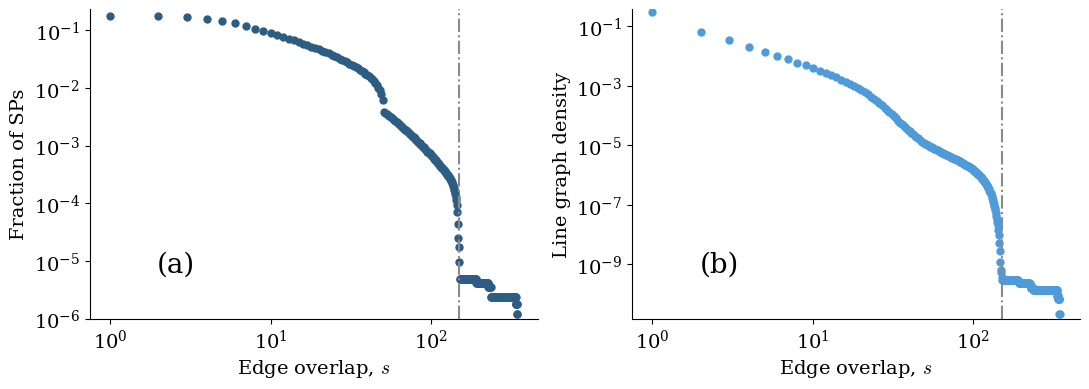

In [12]:
df = pd.read_csv("data/s_count.txt", sep="\t")

plt.figure(figsize=(11, 4))

plt.subplot(121)
ax = plt.gca()
plt.text(0.15, 0.15, "(a)", fontsize=20, transform=ax.transAxes)

ymin = 1e-6
ymax = max(df["nodes"] / num_nodes) * 1.3
plt.plot(df["s"], df["nodes"] / num_nodes, "o", color=colors[0], markersize=5)
plt.plot([150, 150], [ymin, ymax], "-.", label="Max. SP size", color=colors[4])

plt.xlabel(r"Edge overlap, $s$")
plt.ylabel("Fraction of SPs")
plt.yscale("log")
plt.xscale("log")
plt.minorticks_off()
sns.despine()

plt.ylim([ymin, ymax])

plt.subplot(122)
ax = plt.gca()
plt.text(0.15, 0.15, "(b)", fontsize=20, transform=ax.transAxes)

max_edges = (num_edges - 1) * num_edges / 2
ymin = 1.5e-11
ymax = max(df["edges"] / max_edges) * 1.3
plt.plot(df["s"], df["edges"] / max_edges, "o", color=colors[1], markersize=5)
plt.plot([150, 150], [ymin, ymax], "-.", label="Max. SP size", color=colors[4])

plt.xlabel(r"Edge overlap, $s$")
plt.ylabel("Line graph density")
plt.yscale("log")
plt.xscale("log")
plt.minorticks_off()
sns.despine()
plt.ylim([ymin, ymax])

plt.tight_layout()
plt.savefig("figures/starterpack_s-line-graph_stats.pdf", dpi=1000)

In [13]:
cooccurrence_counts = np.loadtxt(
    "data/starterpack_pair_co-occurrence.csv.gz", dtype=int
)
k_core = np.loadtxt("data/starterpack_k-core.csv.gz", dtype=int)

with open("data/edge_entropy.json") as f:
    edge_entropy = json.loads(f.read())

In [14]:
min_core = min(k_core)
max_core = max(k_core)
num_bins = 100
bins = np.logspace(np.log10(min_core), np.log10(max_core), num=num_bins)

p1, bin_edges1 = np.histogram(k_core, bins=bins, density=True)
p1 /= p1.sum()

x1 = np.sqrt(bin_edges1[:-1] * bin_edges1[1:])


min_count = min(cooccurrence_counts)
max_count = max(cooccurrence_counts)
num_bins = 75
bins = np.logspace(np.log10(min_count), np.log10(max_count), num=num_bins)

p2, bin_edges2 = np.histogram(cooccurrence_counts, bins=bins, density=True)
p2 /= p2.sum()

x2 = np.sqrt(bin_edges2[:-1] * bin_edges2[1:])

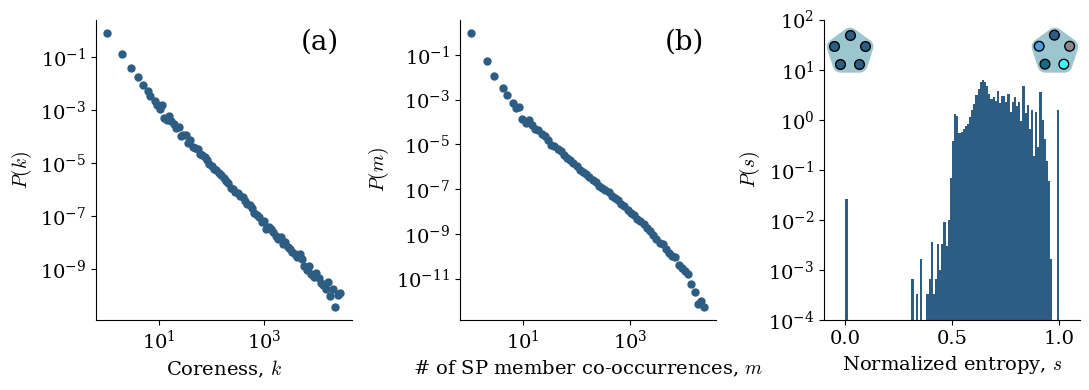

In [29]:
pos = {
    0: [0, 1],
    1: [-0.9510565162951535, 0.3090169943749475],
    2: [-0.5877852522924732, -0.8090169943749473],
    3: [0.5877852522924729, -0.8090169943749476],
    4: [0.9510565162951536, 0.3090169943749472],
}

plt.figure(figsize=(11, 4))
plt.subplot(131)
ax = plt.gca()
plt.text(0.8, 0.9, "(a)", fontsize=20, transform=ax.transAxes)

plt.loglog(x1, p1, "o", markersize=5, color=colors[0])

plt.xlabel(r"Coreness, $k$")
plt.ylabel(r"$P(k)$")
plt.minorticks_off()
sns.despine()

plt.subplot(132)
ax = plt.gca()
plt.text(0.8, 0.9, "(b)", fontsize=20, transform=ax.transAxes)
plt.loglog(x2, p2, "o", markersize=5, color=colors[0])
plt.xlabel("# of SP member co-occurrences, $m$")
plt.ylabel(r"$P(m)$")
plt.minorticks_off()
sns.despine()

plt.subplot(133)
plt.hist(edge_entropy.values(), bins=100, density=True, color=colors[0])
plt.xlim([-0.1, 1.1])
plt.ylim([1e-4, 100])
inset_ax = plt.gca().inset_axes(
    [0.0, 0.8, 0.2, 0.2],
)
H = xgi.Hypergraph([[0, 1, 2, 3, 4]])
xgi.draw(
    H,
    ax=inset_ax,
    pos=pos,
    edge_fc=colors[2],
    node_fc=colors[0],
    node_size=7,
    hull=True,
    radius=0.5,
)


inset_ax = plt.gca().inset_axes(
    [0.8, 0.8, 0.2, 0.2],
)
xgi.draw(
    H,
    ax=inset_ax,
    pos=pos,
    edge_fc=colors[2],
    node_fc=[colors[0], colors[1], colors[2], colors[3], colors[4]],
    node_size=7,
    hull=True,
    radius=0.5,
)
plt.yscale("log")
plt.xlabel(r"Normalized entropy, $s$")
plt.ylabel(r"$P(s)$")
plt.minorticks_off()
sns.despine()
plt.tight_layout()
plt.savefig("figures/mesoscale_starterpack_stats.pdf")

In [30]:
H = xgi.read_hif("data/deidentified_starterpack_hif.json")


In [32]:
x = []
y = []
for e in edge_entropy:
    x.append(H.edges.size[int(e)])
    y.append(edge_entropy[e])

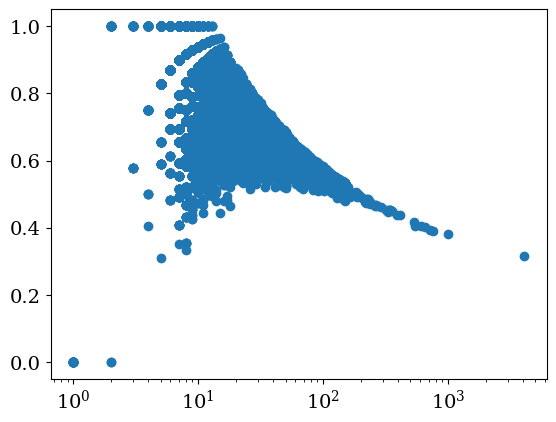

In [35]:
plt.scatter(x, y)
plt.xscale("log")